# Requirement

In [ ]:
%pip install numpy==1.25
%pip install pandas==2.2.2
%pip install pmdarima

# Import necessary libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Overview and Cleaning

In [18]:
# Đọc dữ liệu
df = pd.read_csv("gold_prices.csv")

# Xem 5 dòng đầu và cuối
print(df.head())
print(df.tail(5))
print("\nThông tin dữ liệu:")
df.info()
print("\nThống kê mô tả dữ liệu:")
print(df.describe())
#Đổi tên cột
df.rename(columns={
    'Buy Price (x1000đ/lượng)': 'Buy Price',
    'Sell Price (x1000đ/lượng)': 'Sell Price'
}, inplace=True)

         Date  Buy Price (x1000đ/lượng)  Sell Price (x1000đ/lượng)
0  2009-08-01                     21.13                      21.19
1  2009-08-02                     21.13                      21.19
2  2009-08-03                     21.13                      21.19
3  2009-08-04                     21.13                      21.19
4  2009-08-05                     21.13                      21.19
            Date  Buy Price (x1000đ/lượng)  Sell Price (x1000đ/lượng)
5560  2024-12-28                      82.8                       85.3
5561  2024-12-29                      82.8                       85.3
5562  2024-12-30                      82.8                       85.3
5563  2024-12-31                      82.8                       85.3
5564  2025-01-01                      82.8                       85.3

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtyp

# 2. Data Preprocessing

In [19]:
# Kiểm tra giá trị thiếu
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trong mỗi cột:")
print(missing_values)

Số lượng giá trị thiếu trong mỗi cột:
Date          0
Buy Price     0
Sell Price    0
dtype: int64


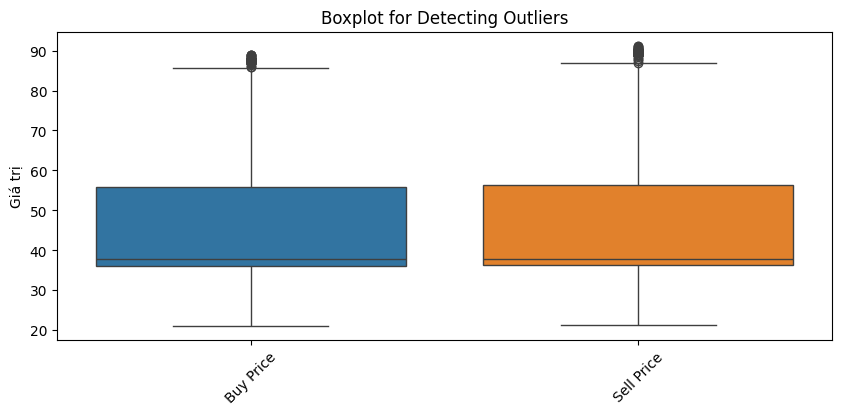

In [20]:
# Lọc các cột số liệu
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Vẽ boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot for Detecting Outliers')
plt.xticks(rotation=45)
plt.ylabel('Giá trị')
plt.show()

In [21]:
# Vì kiểu dữ liệu cột Date đang ở dạng object
# -> Chuyển kiểu dữ liệu cột Date sang datetime
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes
# Đảm bảo dữ liệu được sắp xếp theo thời gian
df = df.sort_values(by='Date')

In [23]:
# Kiểm tra Buy Price  và Sell Price có giá trị âm không
dem_BuyPrice_am = df[df['Buy Price'] < 0].shape[0]
print(dem_BuyPrice_am)
dem_SellPrice_am = df[df['Sell Price'] < 0].shape[0]
print(dem_SellPrice_am)
#Xử lý bằng cách: Thay thế giá trị âm bằng giá trị trung bình của cột
mean_buy = df[df['Buy Price'] >= 0]['Buy Price'].mean()
mean_sell = df[df['Sell Price'] >= 0]['Sell Price'].mean()
df['Buy Price'] = df['Buy Price'].apply(lambda x: mean_buy if x < 0 else x)
df['Sell Price'] = df['Sell Price'].apply(lambda x: mean_sell if x < 0 else x)
# Kiểm tra lại giá trị âm
print(df.dtypes)

0
0
Date          datetime64[ns]
Buy Price            float64
Sell Price           float64
dtype: object


In [24]:
# In kích thước ban đầu
print(f"Kích thước dữ liệu trước khi xử lý outliers: {df.shape}")

# Copy dataframe
df_clean = df.copy()

# Chọn các cột số cần xử lý
cols = ['Buy Price', 'Sell Price']

for col in cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# In kích thước sau xử lý
print(f"Kích thước dữ liệu sau khi xử lý outliers: {df_clean.shape}")


Kích thước dữ liệu trước khi xử lý outliers: (5565, 3)
Kích thước dữ liệu sau khi xử lý outliers: (5501, 3)


In [25]:
# Xuất ra dữ liệu đã xử lý
df_clean.to_csv("gold_prices_cleaned.csv", index=False)